In [109]:
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install joblib

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib


In [95]:
df = pd.read_csv("drug200.csv")
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [96]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [97]:
le = LabelEncoder()

for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


In [98]:
X = df.drop("Drug", axis=1)
y = df["Drug"]


In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [100]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [101]:
model = SVC(C=1, kernel='rbf')
model.fit(X_train, y_train)


,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [102]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.975

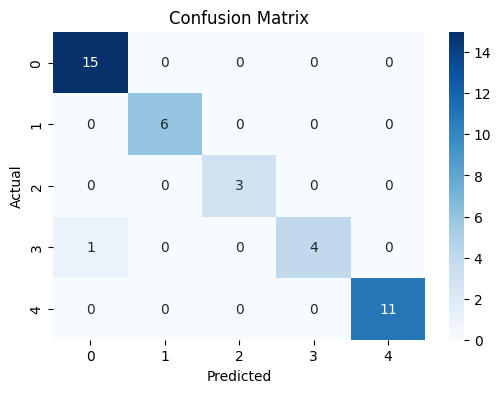

In [103]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [106]:
C_values = [0.1, 1, 2, 5, 7, 10]
er = []

for c in C_values:
    svm = SVC(C=c)
    svm.fit(X_train, y_train)
    y_pred_c = svm.predict(X_test)
    er.append(1 - accuracy_score(y_test, y_pred_c))


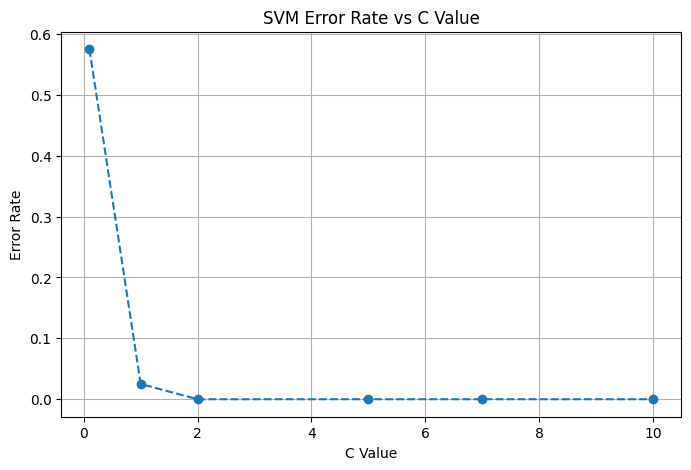

In [105]:
plt.figure(figsize=(8,5))
plt.plot(C_values, er, marker='o', linestyle='dashed')
plt.xlabel("C Value")
plt.ylabel("Error Rate")
plt.title("SVM Error Rate vs C Value")
plt.grid(True)
plt.show()


In [113]:
joblib.dump(model, "drug_model.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(le, "label_encoder.joblib")


['label_encoder.joblib']

In [114]:
loaded_model = joblib.load("drug_model.joblib")
loaded_scaler = joblib.load("scaler.joblib")

sample = X_test[0].reshape(1, -1)
prediction = loaded_model.predict(sample)
prediction


array([4])